## The Objective

The objective is to minimize the customer's monetary loss using machine learning techniques. The customer is currently experiencing a $25.00 loss for each false positive prediction and a loss of $125.00 for false negative predictions. Our goal in this scenario is to generate a model that minimizes the cost of doing business and provide adequate justifications for the decisions made in the final model.

## The Dataset

The dataset features 160,000 records, 50 features, and a binary target variable. The dataset does not come with any metadata at all, so we must rely strictly on the interpretations of each feature and discover relationships between the features that help to meet the overall objective of minimizing costs for the customer.

## Methods

TBD

## Code

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

random_state = 42

In [5]:
data = pd.read_csv('./data/final_project.csv')
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [71]:
y = data['y']
X = data.drop(['y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
print('X_train: ', X_train.shape,
      '\ny_train: ', y_train.shape,
      '\nX_test: ', X_test.shape,
      '\ny_test: ', y_test.shape)

X_train:  (128000, 50) 
y_train:  (128000,) 
X_test:  (32000, 50) 
y_test:  (32000,)


In [11]:
X_train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
count,127982.000000,127981.000000,127972.000000,127970.000000,127983.000000,127969.000000,127979.000000,127975.000000,127981.000000,127974.000000,...,127975.000000,127968.000000,127980.000000,127971.000000,127968.000000,127979.000000,127976.000000,127972.000000,127971.000000,127973.000000
mean,-0.000233,0.015927,-1.137009,-0.030134,-0.005189,0.017988,-1.650412,-7.632300,-0.036771,0.013169,...,-2.280161,6.696548,-1.823620,-0.004985,-0.007610,0.000887,-12.757091,0.021462,0.000821,-0.664870
std,0.371378,6.338409,13.287193,8.067211,6.381621,7.673899,19.318144,30.583165,8.898180,6.347198,...,17.047011,18.697780,5.106297,1.534255,4.157975,0.396842,36.606157,4.794483,1.936761,15.055081
min,-1.592635,-26.053979,-59.394048,-33.864827,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-74.059196,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191
25%,-0.250854,-4.239255,-10.166609,-5.459399,-4.315710,-5.153559,-14.779614,-27.238063,-6.036748,-4.248533,...,-13.918753,-5.804080,-5.147121,-1.041030,-2.808371,-0.266998,-36.444478,-3.232455,-1.322622,-10.937141
50%,-0.001322,0.028105,-1.312739,-0.031448,0.009683,0.028314,-1.905278,-6.873548,-0.014964,0.004454,...,-2.672047,6.824208,-1.917862,-0.007160,-0.010351,0.001770,-12.977831,0.021841,-0.012518,-0.572639
75%,0.249459,4.291164,7.865764,5.429540,4.298284,5.196676,11.439981,12.284980,5.957489,4.302156,...,9.000087,19.273821,1.465863,1.029794,2.777005,0.268573,11.484705,3.266336,1.319282,9.679463
max,1.600849,27.988178,57.908998,38.906025,26.247812,35.550110,84.195332,149.150634,39.049831,27.377842,...,88.824477,100.050432,22.668041,6.441093,17.007392,1.669205,150.859415,20.836854,8.206509,66.877604


In [19]:
# assess missingness in data
names = X_train.columns
for i in names:
    print(i, ': ', 'Train-', sum(pd.isna(X_train[i])),
          'Test-', sum(pd.isna(X_test[i])))

x0 :  Train- 18 Test- 8
x1 :  Train- 19 Test- 6
x2 :  Train- 28 Test- 10
x3 :  Train- 30 Test- 7
x4 :  Train- 17 Test- 9
x5 :  Train- 31 Test- 6
x6 :  Train- 21 Test- 5
x7 :  Train- 25 Test- 2
x8 :  Train- 19 Test- 2
x9 :  Train- 26 Test- 4
x10 :  Train- 33 Test- 10
x11 :  Train- 23 Test- 7
x12 :  Train- 31 Test- 5
x13 :  Train- 26 Test- 5
x14 :  Train- 29 Test- 5
x15 :  Train- 29 Test- 6
x16 :  Train- 19 Test- 7
x17 :  Train- 19 Test- 8
x18 :  Train- 35 Test- 5
x19 :  Train- 24 Test- 11
x20 :  Train- 34 Test- 4
x21 :  Train- 21 Test- 8
x22 :  Train- 21 Test- 6
x23 :  Train- 38 Test- 9
x24 :  Train- 24 Test- 4
x25 :  Train- 19 Test- 3
x26 :  Train- 28 Test- 8
x27 :  Train- 26 Test- 4
x28 :  Train- 29 Test- 6
x29 :  Train- 19 Test- 11
x30 :  Train- 23 Test- 7
x31 :  Train- 34 Test- 5
x32 :  Train- 26 Test- 5
x33 :  Train- 35 Test- 6
x34 :  Train- 36 Test- 5
x35 :  Train- 25 Test- 5
x36 :  Train- 21 Test- 6
x37 :  Train- 17 Test- 6
x38 :  Train- 26 Test- 5
x39 :  Train- 16 Test- 7
x40 : 

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128000 entries, 111609 to 57443
Data columns (total 50 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      127982 non-null  float64
 1   x1      127981 non-null  float64
 2   x2      127972 non-null  float64
 3   x3      127970 non-null  float64
 4   x4      127983 non-null  float64
 5   x5      127969 non-null  float64
 6   x6      127979 non-null  float64
 7   x7      127975 non-null  float64
 8   x8      127981 non-null  float64
 9   x9      127974 non-null  float64
 10  x10     127967 non-null  float64
 11  x11     127977 non-null  float64
 12  x12     127969 non-null  float64
 13  x13     127974 non-null  float64
 14  x14     127971 non-null  float64
 15  x15     127971 non-null  float64
 16  x16     127981 non-null  float64
 17  x17     127981 non-null  float64
 18  x18     127965 non-null  float64
 19  x19     127976 non-null  float64
 20  x20     127966 non-null  float64
 21  x21   

In [111]:
objects = X_train.select_dtypes(['O'])
objects.head()

,x24,x29,x30,x32,x37
111609,asia,Apr,wednesday,-0.0%,$100.73
3785,asia,May,wednesday,0.01%,$1005.31
64066,asia,July,wednesday,0.0%,$-1406.52
103309,asia,Jun,wednesday,0.01%,$-1287.29
9084,asia,Aug,tuesday,0.02%,$-1670.43


In [112]:
objects.describe()

,x24,x29,x30,x32,x37
count,127976,127981,127977,127974,127983
unique,3,12,5,12,107696
top,asia,July,wednesday,0.01%,$237.4
freq,111198,36384,81253,32630,6


In [72]:
# fix spelling error
X_test['x24'] = X_test['x24'].str.replace('euorpe', 'europe')
X_train['x24'] = X_train['x24'].str.replace('euorpe', 'europe')

In [95]:
names = [i for i in objects.columns]
list(names)

['x24', 'x29', 'x30', 'x32', 'x37']

In [108]:
names = [i for i in list(objects.columns)]
names.remove('x37')
type(names)

list

In [113]:
names = [i for i in list(objects.columns)]
names.remove('x37')

le = LabelEncoder()
for i in names:
    print(objects[i][0])
    objects[i] = le.fit_transform(objects[i])
objects.describe()

europe


TypeError: argument must be a string or number

In [83]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
obj2 = objects.copy()
for i in list(obj2.columns):
    obj2[i] = le.fit_transform(obj2[i])
obj2.head()

TypeError: argument must be a string or number

In [68]:
for i in objects.columns:
    X_train[i] = obj2[i]
    X_test[i] = le.transform(X_test[i])

ValueError: y contains previously unseen labels: 'europe'

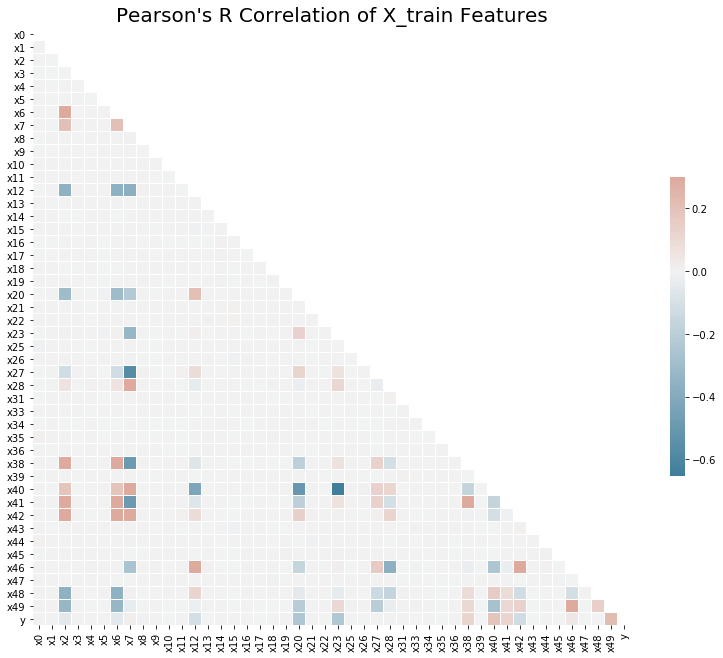

In [26]:
with_labels = pd.concat([X_train, y_train], axis = 1)
feature_corr = with_labels.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(feature_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14,11))
plt.title("Pearson's R Correlation of X_train Features", fontsize = 20)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(feature_corr, mask=mask, 
                            cmap=cmap,
                            vmax=.3, 
                            center=0, 
                            square=True, 
                            linewidths=.1, 
                            # annot= True,
                            cbar_kws={"shrink": .5});

In [29]:
from sklearn.impute import KNNImputer

KNNimp = KNNImputer(n_neighbors=3)
KNNimp.fit_transform(X_train)
KNNimp.fit_transform(X_test)

for i in names:
    print(i, ': ', 'Train-', sum(pd.isna(X_train[i])),
          'Test-', sum(pd.isna(X_test[i])))

ValueError: could not convert string to float: 'asia'